In [1]:
#import required libraries
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from numpy import mean
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import std
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Import dataset

d = pd.read_csv("house_data.csv")
## dimensionality reduction
#X = d.drop("longitude", axis = 1)
#X_2 = X.drop("latitude", axis = 1)
#d=X_2
#viewing the dataset
d.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [103]:
d.info(), len(d)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
 10  labels              20640 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 1.7 MB


(None, 20640)

In [4]:
d.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>

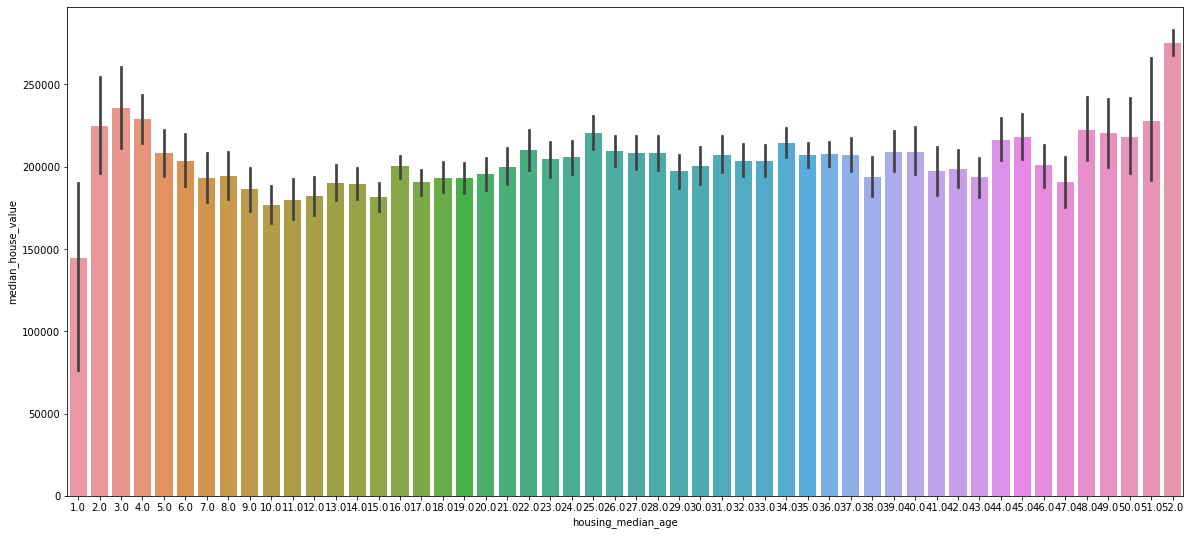

In [5]:
#plt.hist(d["median_income"], bins = 20)
#plt.xlabel("Bins")
#plt.ylabel("Frequency")
#plt.title("Median Income Histogram Chart w/bins=20")
#plt.show()

# the relationship btw house age and house price.
plt.figure(figsize=(20,9))
sns.barplot(x = d["housing_median_age"], y = d["median_house_value"])

C:\Users\cagri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


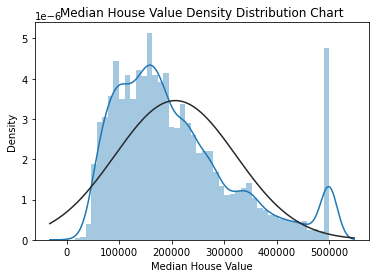

In [6]:
# look at the density distribution chart for house prices.
from scipy.stats import norm
sns.distplot(d["median_house_value"], fit=norm)
plt.xlabel("Median House Value")
plt.ylabel("Density")
plt.title("Median House Value Density Distribution Chart")
plt.show()

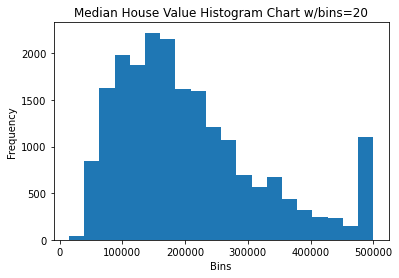

In [7]:
# house price histogram chart
plt.hist(d["median_house_value"], bins = 20)
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.title("Median House Value Histogram Chart w/bins=20")
plt.show()

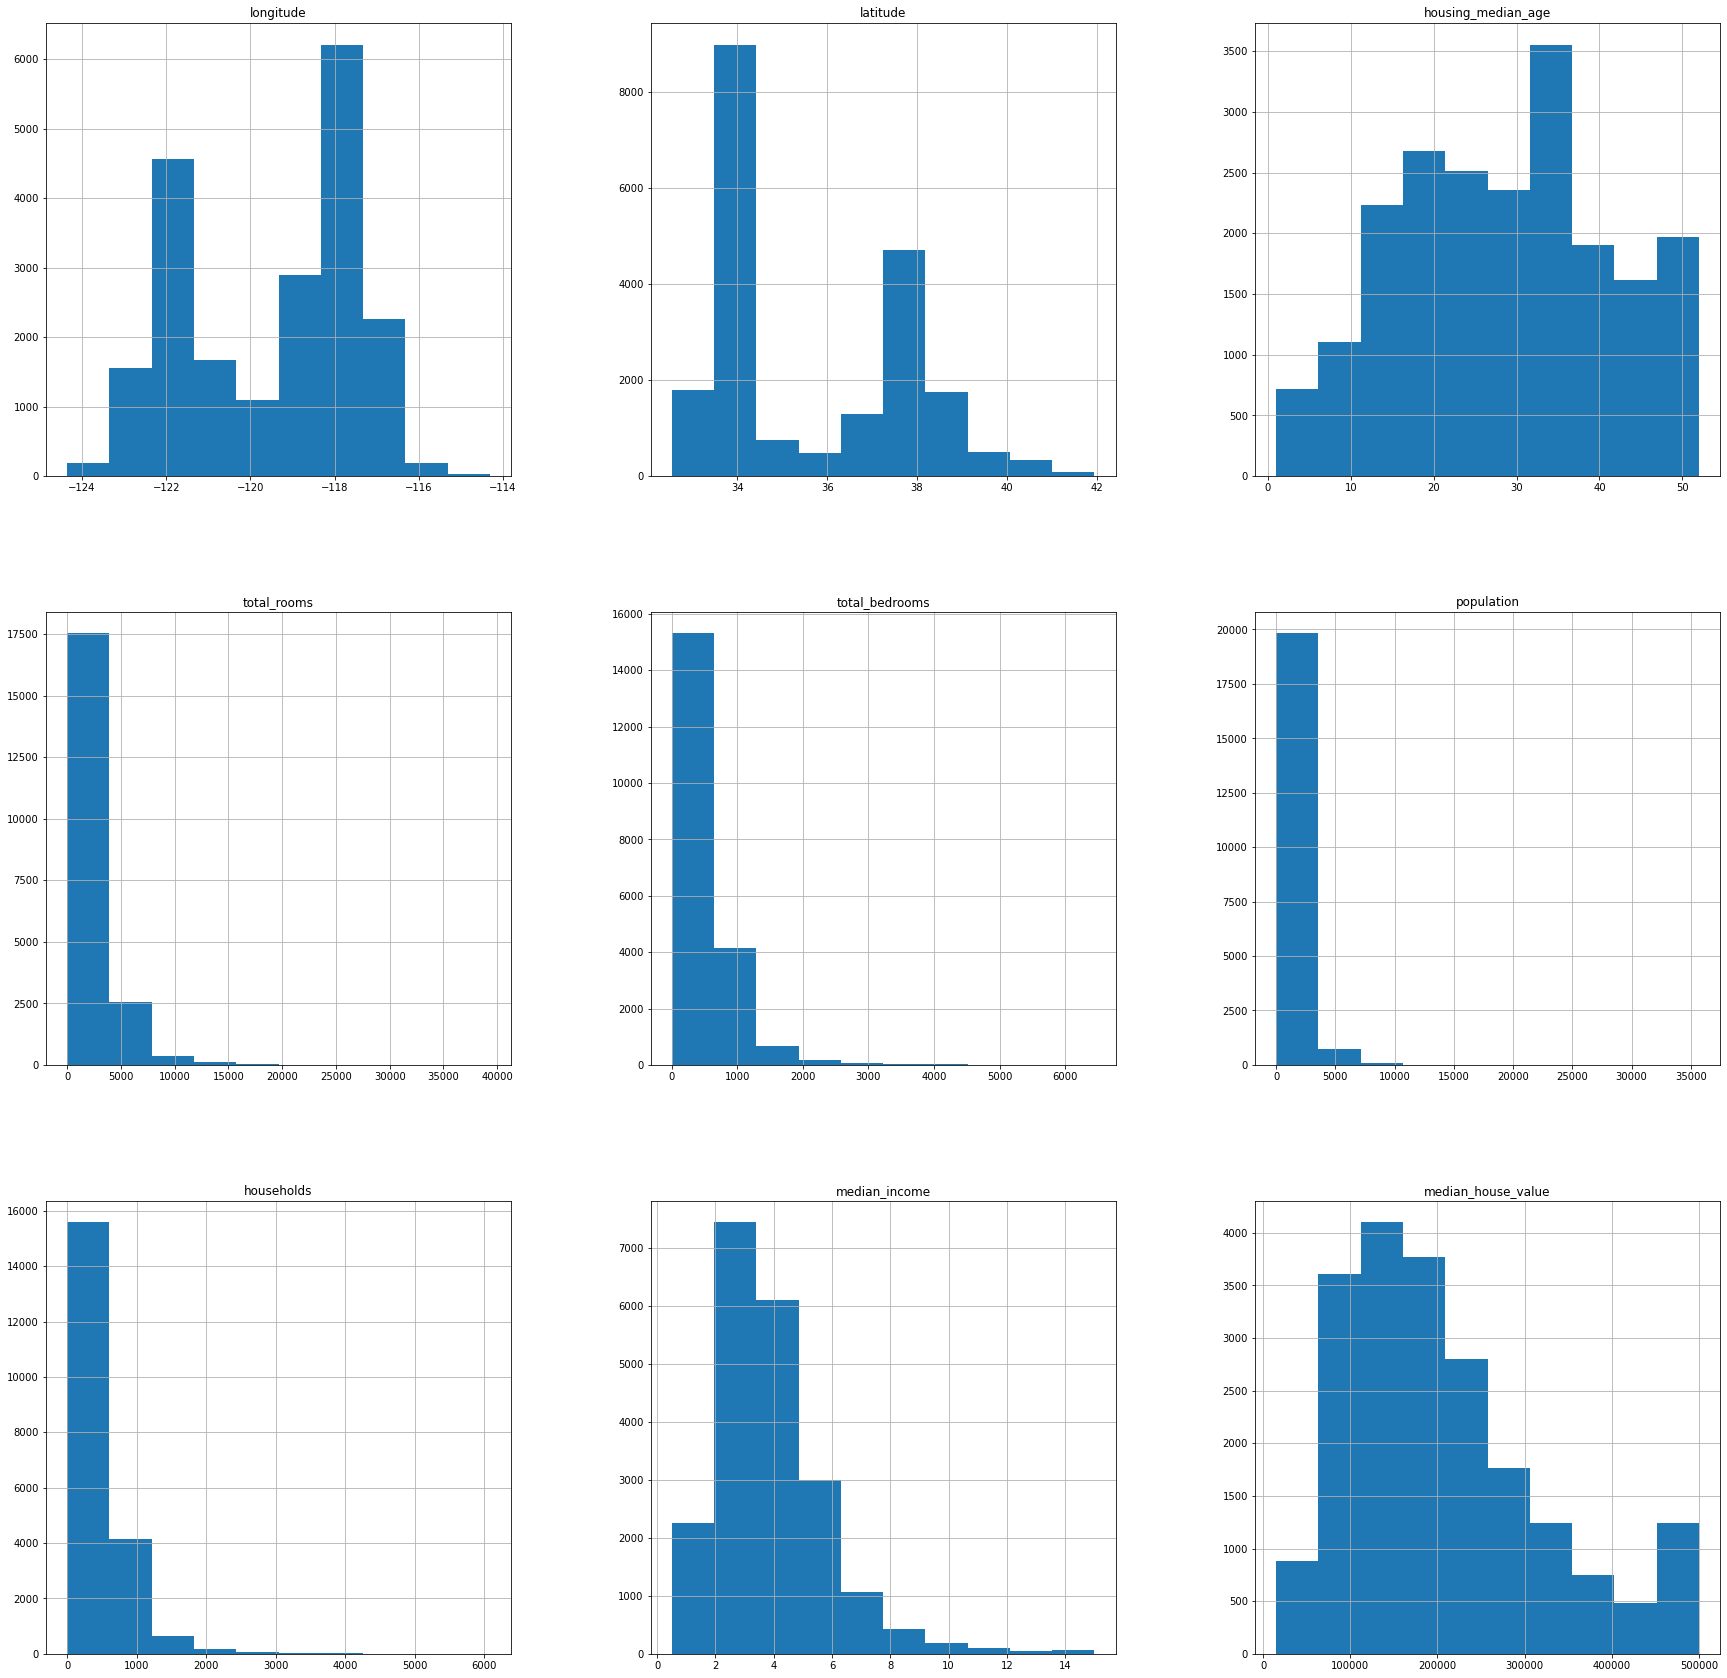

In [8]:
#Understanding the features of dataframe by plotting plots.
d.hist(bins = 10, figsize = (30,30))
plt.show()

<AxesSubplot:>

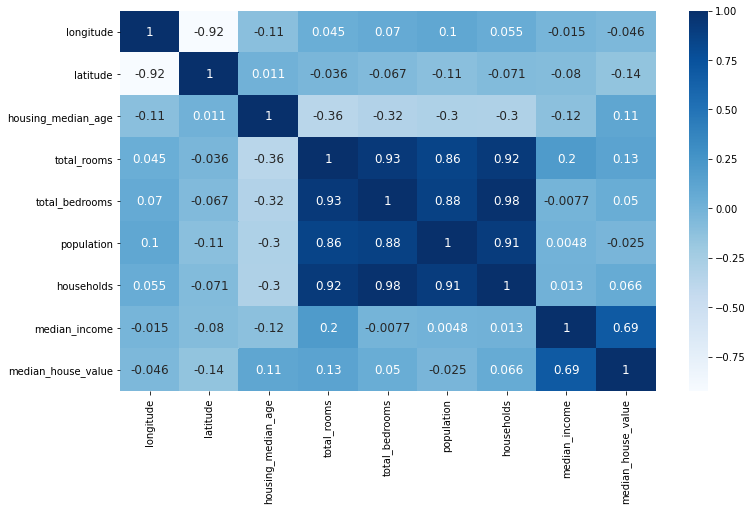

In [9]:
#heatmap for correlation visualization
fig, ax = plt.subplots(figsize = (12,7))
sns.heatmap(d.corr(), annot=True, cmap="Blues", annot_kws={"fontsize":12})

In [10]:
# correlation btw house prices and other columns
d.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [11]:
# check whether data includes na values or null values or not
d.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
#replace na values of total bedrooms with 0
d["total_bedrooms"].fillna(0, inplace=True)
d.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

C:\Users\cagri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:827: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn("algorithm='elkan' doesn't make sense for a single "


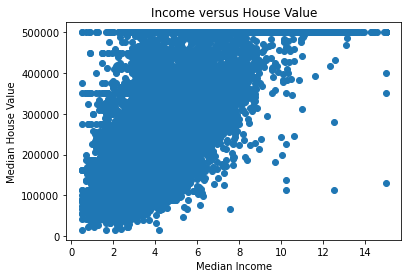

In [13]:
#Clustering using K- means
#Segmentation using median_income and median_house_value

X1 = d[["median_house_value" , "median_income"]].values
inertia = []
 # KMEANS PARAMATER DEFINITIONS: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

plt.scatter(d["median_income"], d["median_house_value"])
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Income versus House Value")
plt.show()

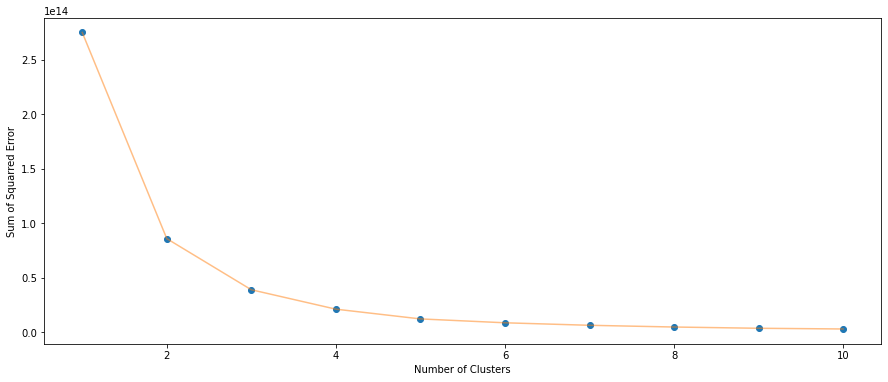

In [14]:
##find the elbow point and decide the number of clusters of the algorithm

plt.figure(figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Sum of Squarred Error')
plt.show()

In [15]:
# apply K-means and show the centroied of clusters and cluster labels of each 
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_


cluster_map = pd.DataFrame()
cluster_map['data_index'] = d.index.values
cluster_map['cluster'] = labels1

cluster_map[cluster_map.cluster == 1]["data_index"]

centroids1,labels1

(array([[8.97061865e+04, 2.49759949e+00],
        [2.44828406e+05, 4.34406594e+00],
        [3.46728909e+05, 5.24167195e+00],
        [1.64029052e+05, 3.46104272e+00],
        [4.80525164e+05, 7.01612339e+00]]),
 array([4, 2, 2, ..., 0, 0, 0]))

In [16]:
#set the values for k-means clustering visualization

h = 100
x_min, x_max = X1[:, 0].min(), X1[:, 0].max()
y_min, y_max = X1[:, 1].min(), X1[:, 1].max()

## arrange() generates outputs between min and max within specified intervals
## meshgrid() returns two 2-dimensional arrays, representing the X and Y coordinates of all the points. 
## ravel() specify all of the values of an array in one row (each column includes only one value)
## np.c_ concenation of two raveled arrays 
## use algorithm.predict to estimate the clusters for each value in concenated xx and yy (algorithm is defined under KMeans)
## PREDICT FUCNTION : https://www.askpython.com/python/examples/python-predict-function
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

<ipython-input-104-5fdff259eb49>:6: UserWarning: Attempting to set identical bottom == top == 0.4999 results in singular transformations; automatically expanding.
  plt.imshow(Z , interpolation='nearest',


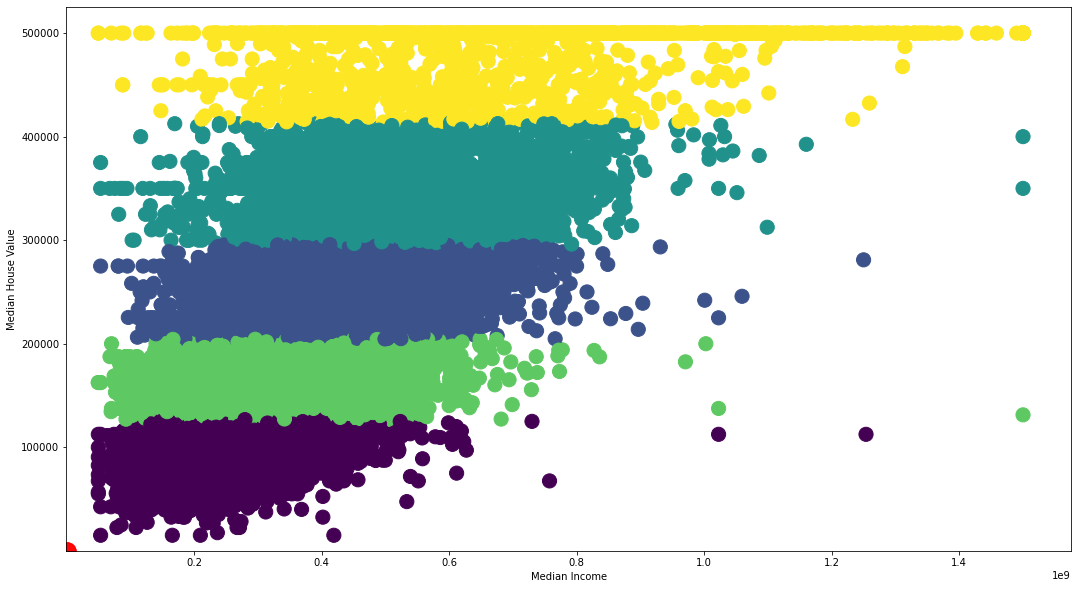

In [104]:
# visualize the k-means clustering
d_2 = d
d_2["median_income"] = d_2["median_income"]*10000
plt.figure(figsize = (18 , 10) )
plt.clf() # used to clear the current figure.
Z = Z.reshape(xx.shape) ##https://www.geeksforgeeks.org/reshape-numpy-array/
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower') ## https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
plt.scatter( x = "median_income" ,y = "median_house_value" , data = d_2 , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel("Median House Value") , plt.xlabel("Median Income")

plt.show()

In [18]:
 # replace string classifications with numerical classifications.
    df = d
    def ocean_to_numeric(x):
        if x=="NEAR BAY": return 1
        if x=="<1H OCEAN":   return 2
        if x=="INLAND": return 3
        if x=="NEAR OCEAN": return 4
        if x=="ISLAND": return 5
   
    df["ocean_proximity"] = df["ocean_proximity"].apply(ocean_to_numeric)
    df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,1
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,15603.0,78100.0,3
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,25568.0,77100.0,3
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,17000.0,92300.0,3
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,18672.0,84700.0,3


In [45]:
# transform the data to standardize each column values and apply dbscan clustering
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
tsnedata = tsne.fit_transform(df)

from sklearn.cluster import DBSCAN
db_scan = DBSCAN(eps=3, min_samples=20).fit(tsnedata)
db_scan.labels_

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [46]:
# clustering evaluation for dbscan
dataa = d
cluster_labels = db_scan.labels_
dataa["labels"] = cluster_labels
from sklearn import metrics
metrics.silhouette_score(dataa, dataa["labels"])

#The Silhouette Coefficient is bounded between 1 and -1. The best value is 1, the worst is -1. 
#A higher score indicates that the model has better defined, more dense clusters. 
#Values close to 0 indicate overlapping clusters, 
#while negative values usually indicate that data points have been assigned to the wrong clusters.

-0.09008030162285857

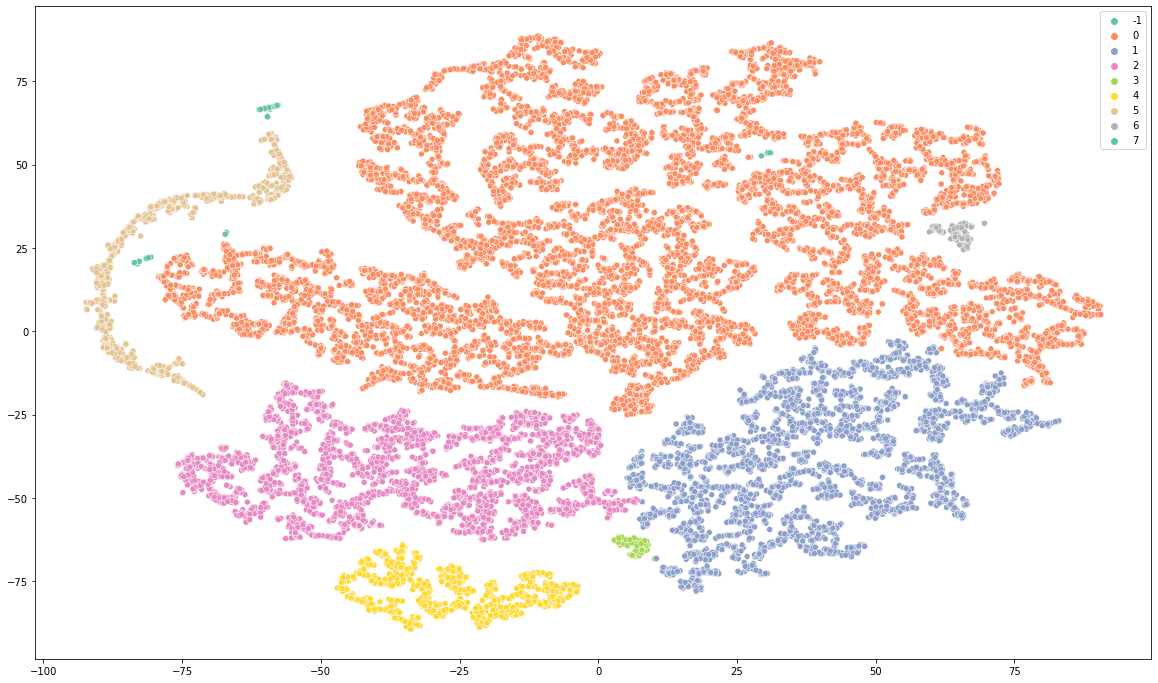

In [47]:
# visualize dbscan clustering
plt.figure(figsize=(20,12))
sns.scatterplot(x=tsnedata[:,0], y=tsnedata[:,1], hue=db_scan.labels_, palette="Set2")
plt.show()

In [48]:
d["ocean_proximity"].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [49]:
# seperate the data set for house price calculation
df = df.reset_index()
X = df.drop('median_house_value',axis=1)
y = df['median_house_value']
X, y

(       index  longitude  latitude  housing_median_age  total_rooms  \
 0          0    -122.23     37.88                41.0        880.0   
 1          1    -122.22     37.86                21.0       7099.0   
 2          2    -122.24     37.85                52.0       1467.0   
 3          3    -122.25     37.85                52.0       1274.0   
 4          4    -122.25     37.85                52.0       1627.0   
 ...      ...        ...       ...                 ...          ...   
 20635  20635    -121.09     39.48                25.0       1665.0   
 20636  20636    -121.21     39.49                18.0        697.0   
 20637  20637    -121.22     39.43                17.0       2254.0   
 20638  20638    -121.32     39.43                18.0       1860.0   
 20639  20639    -121.24     39.37                16.0       2785.0   
 
        total_bedrooms  population  households  median_income  ocean_proximity  \
 0               129.0       322.0       126.0        83252.0   

In [50]:
# define mean absolute percentage error function for further calculations.
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape


In [125]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X,y)

y_knn_pred = knn.predict(X)

knn.score(X,y)
print(f"Accuracy of KNN on X , y:", knn.score(X, y))
print(f"Accuracy of testing set: ", knn.score(X_test, y_test))
print(f"Mean Absolute Percentage Error value of original prediction: ", MAPE(y, y_knn_pred), "%")

Accuracy of KNN on X , y: 0.5087693798449613
Accuracy of testing set:  0.5053294573643411
Mean Absolute Percentage Error value of original prediction:  11.798908416838017 %


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

knn.fit(X_train, y_train)

knn.score(X_train, y_train), knn.score(X_test, y_test)

y_knn_pred_test = knn.predict(X_test)
print(f"Accuracy of training set:", knn.score(X_train, y_train))
print(f"Accuracy of testing set: ", knn.score(X_test, y_test))
print(f"Mean Absolute Percentage Error value of Test prediction: ", MAPE(y_test, y_knn_pred_test), "%")


Accuracy of training set: 0.5121124031007752
Accuracy of testing set:  0.01614987080103359
Mean Absolute Percentage Error value of Test prediction:  28.245530600100455 %


In [53]:
dtree = DecisionTreeRegressor(random_state=1)

# Fit model
dtree.fit(X, y)


DecisionTreeRegressor(random_state=1)

In [106]:
# get predicted prices on test data
dtree.fit(X_train, y_train)

y_tree_pred = dtree.predict(X_test)

print(f"Accuracy of training set:", dtree.score(X_train, y_train))
print(f"Accuracy of testing set: ", dtree.score(X_test, y_test))
print(f"Mean Absolute Percentage Error value of Test prediction: ", MAPE(y_test, y_tree_pred), "%")

Accuracy of training set: 1.0
Accuracy of testing set:  0.811266439975421
Mean Absolute Percentage Error value of Test prediction:  14.450051037520344 %


In [ ]:
#To improve the model, we can use Random Forest
#The random forest uses many trees, and it makes a prediction by averaging the predictions of each component tree.
#It generally has much better predictive accuracy than a single decision tree and it works well with default parameters


In [105]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
y_forest_pred = forest_model.predict(X_test)

print(f"Accuracy of training set:", forest_model.score(X_train, y_train))
print(f"Accuracy of testing set: ", forest_model.score(X_test, y_test))
print(f"Mean Absolute Percentage Error value of Test prediction: ", MAPE(y_test, y_forest_pred), "%")

Accuracy of training set: 0.9871321613665333
Accuracy of testing set:  0.9050501129926136
Mean Absolute Percentage Error value of Test prediction:  10.830817689149494 %


In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and 
#might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used 
#prior to model fitting.

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)
y_lr_pred2 = lr.predict(X_train)
print(f"Accuracy of training set:", lr.score(X_train, y_train))
print(f"Accuracy of testing set: ", lr.score(X_test, y_test))
print(f"Mean Absolute Percentage Error value of Test prediction: ", MAPE(y_test, y_lr_pred), "%")

Accuracy of training set: 0.6406723213222815
Accuracy of testing set:  0.6234750615192607
Mean Absolute Percentage Error value of Test prediction:  31.321214527177055 %


In [100]:
model = Ridge(alpha=180)
# define model evaluation method
model.fit(X_train, y_train)
# evaluate model
y_rlr_pred = model.predict(X_test)
y_rlr_pred2 = model.predict(X_train)

print(f"Accuracy of training set:", model.score(X_train, y_train))
print(f"Accuracy of testing set: ", model.score(X_test, y_test))
print(f"Mean Absolute Percentage Error value of Test prediction: ", MAPE(y_test, y_rlr_pred), "%")

Accuracy of training set: 0.6382263522639832
Accuracy of testing set:  0.6267043510262168
Mean Absolute Percentage Error value of Test prediction:  31.087155558765605 %


In [101]:
print(f"Cross Validation score with k = 3 & Linear Regression model: ", cross_val_score(lr, X_train, y_train, cv=3))
print(f"Cross Validation score with k = 3 & Ridge Regression model: ", cross_val_score(model, X_train, y_train, cv=3))
print(f"Cross Validation score with k = 3 & Random Forest model: ", cross_val_score(forest_model, X_train, y_train, cv=3))
print(f"Cross Validation score with k = 3 & Decision Tree model: ", cross_val_score(dtree, X_train, y_train, cv=3))
print(f"Cross Validation score with k = 3 & K Nearest Neighbor model: ", cross_val_score(knn, X_train, y_train, cv=3))


Cross Validation score with k = 3 & Linear Regression model:  [0.64188205 0.65525092 0.61841133]
Cross Validation score with k = 3 & Ridge Regression model:  [0.6375388  0.64779044 0.61852861]
Cross Validation score with k = 3 & Random Forest model:  [0.90159269 0.90913482 0.89750694]
Cross Validation score with k = 3 & Decision Tree model:  [0.80242215 0.81566873 0.80191386]


C:\Users\cagri\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation score with k = 3 & K Nearest Neighbor model:  [0.04671927 0.0448505  0.04630399]
